<a href="https://colab.research.google.com/github/darshil8008/ML-Algorithms-Implementation/blob/main/Diabetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
df=pd.read_csv('DS/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y=df.Outcome

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)
print(xtrain.shape)
print(ytrain.shape)

(576, 8)
(576,)


In [ ]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ypred=clf.predict(xtest)

In [ ]:
dp=pd.DataFrame({'Actual':ytest,'Predicted':ypred})
dp

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,1
726,0,0
...,...,...
247,0,1
189,1,0
139,0,0
518,0,0


In [ ]:
print(metrics.classification_report(ytest,ypred))
print(metrics.confusion_matrix(ytest,ypred))
print(metrics.accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.62      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192

[[95 28]
 [26 43]]
0.71875


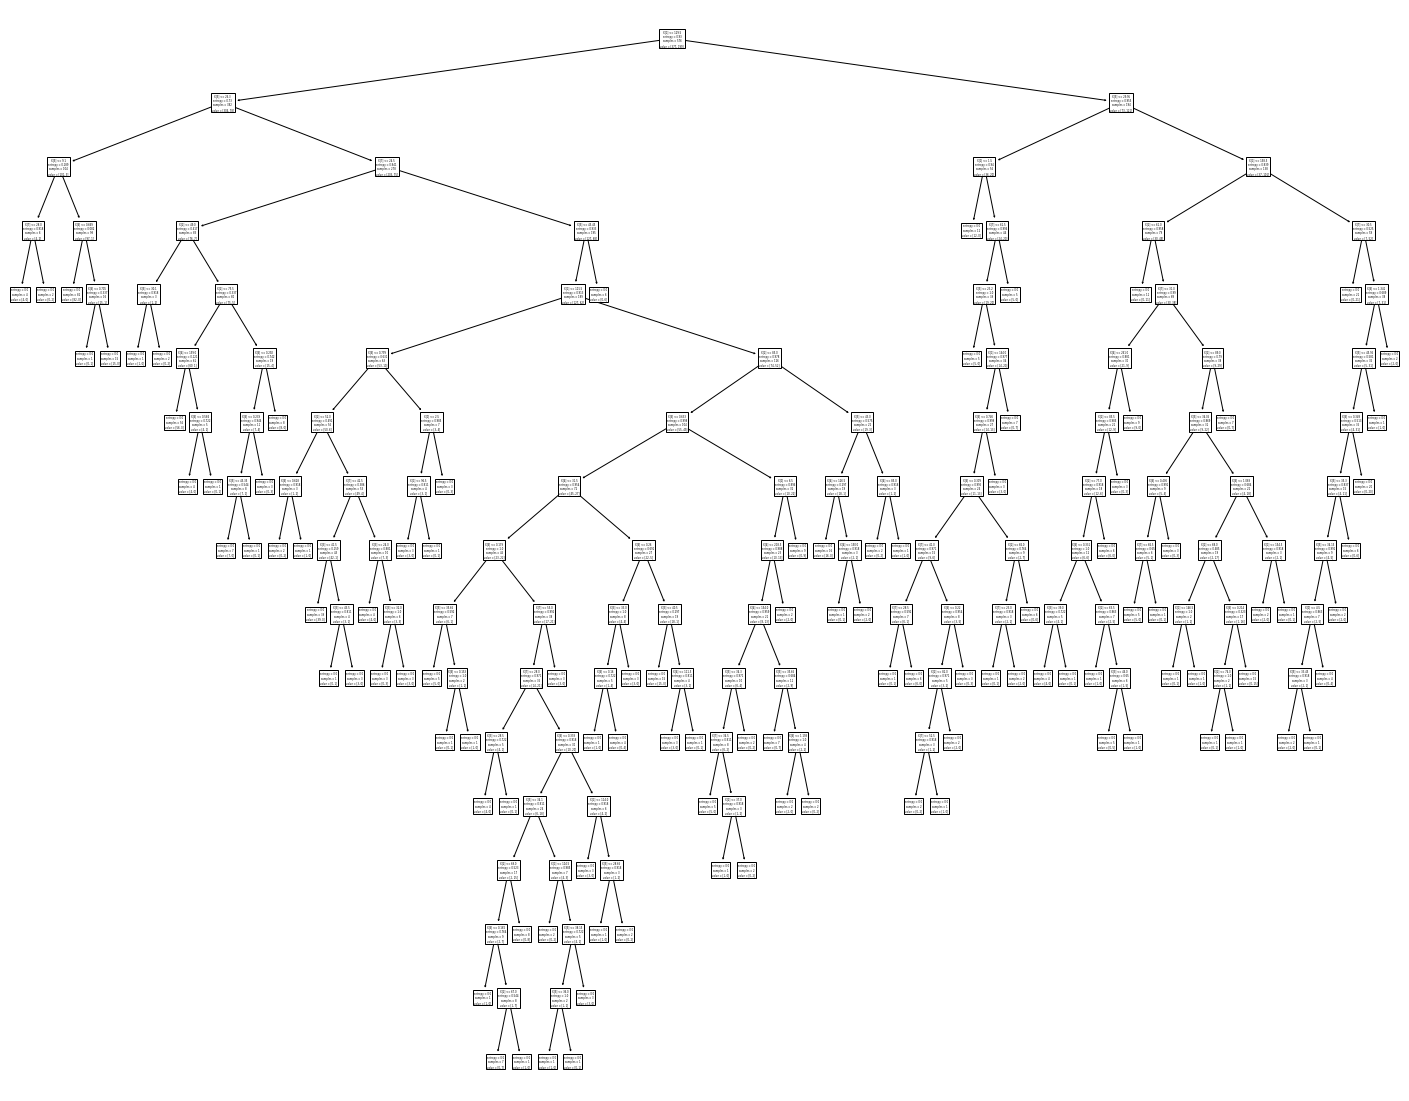

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf)

[Text(159.55011160714287, 211.04470588235293, 'X[1] <= 129.5\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'), Text(51.70379464285715, 198.25411764705882, 'X[5] <= 26.3\nentropy = 0.73\nsamples = 382\nvalue = [304, 78]'), Text(12.342857142857143, 185.4635294117647, 'X[5] <= 9.1\nentropy = 0.189\nsamples = 104\nvalue = [101, 3]'), Text(6.171428571428572, 172.6729411764706, 'X[7] <= 28.0\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'), Text(3.085714285714286, 159.88235294117646, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'), Text(9.257142857142858, 159.88235294117646, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(18.514285714285716, 172.6729411764706, 'X[6] <= 0.669\nentropy = 0.082\nsamples = 98\nvalue = [97, 1]'), Text(15.428571428571429, 159.88235294117646, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'), Text(21.6, 159.88235294117646, 'X[6] <= 0.705\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'), Text(18.514285714285716, 147.09176470588235, 'entropy = 0.0\nsamples = 1\nv

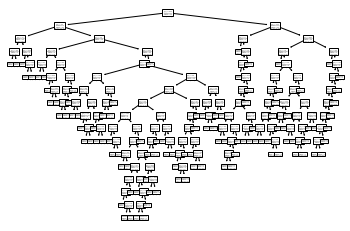

In [ ]:

print(plot_tree(clf))

In [ ]:
print(tree.export_text(clf))

|--- feature_1 <= 129.50
|   |--- feature_5 <= 26.30
|   |   |--- feature_5 <= 9.10
|   |   |   |--- feature_7 <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  28.00
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  26.30
|   |   |--- feature_7 <= 24.50
|   |   |   |--- feature_2 <= 49.00
|   |   |   |   |--- feature_5 <= 30.10
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  30.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  49.00
|   |   |   |   |--- feature_2 <= 75.50
|   |   |   |   |   |--- feature_4 <= 159.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  159.00
|   |   |   |   |   |   |--- feature_6 <= 0.58
|   |   |   

[Text(158.59222051056338, 211.04470588235293, 'X[1] <= 129.5\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(52.62563820422535, 198.25411764705882, 'X[5] <= 26.3\nentropy = 0.73\nsamples = 382\nvalue = [304, 78]'),
 Text(12.574647887323945, 185.4635294117647, 'X[5] <= 9.1\nentropy = 0.189\nsamples = 104\nvalue = [101, 3]'),
 Text(6.287323943661972, 172.6729411764706, 'X[0] <= 7.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(3.143661971830986, 159.88235294117646, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(9.430985915492958, 159.88235294117646, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(18.861971830985915, 172.6729411764706, 'X[6] <= 0.669\nentropy = 0.082\nsamples = 98\nvalue = [97, 1]'),
 Text(15.718309859154932, 159.88235294117646, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(22.005633802816902, 159.88235294117646, 'X[6] <= 0.705\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(18.861971830985915, 147.09176470588235, 'entropy

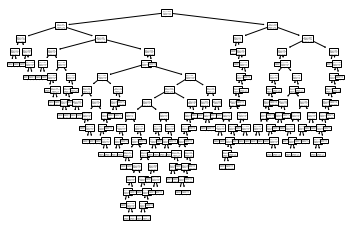

In [ ]:
tree.plot_tree(clf)